# Домашнее задание №4
## Задание №1

1) Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

In [1]:
g =  open("HarryPotter", "r", encoding="utf-8")
potter = g.read() #читаем файл и записываем текст из файла в переменную
g.close()

2) Очистите текст от пунктуации.  
 


In [2]:
# очищаем текст от пунктуации с помощью генератора списков
no_punct = [word.strip("!?«»'—'.,-") for word in potter.split()]


Приведите его к нижнему регистру

In [3]:
potter2 = []
for word in no_punct: #проходимся циклом по списку и приводим все буквы к нижнему регистру
    if word.isalpha():
        potter2.append(word.lower())

Лемматизируйте и запишите в новый файл.

In [4]:
import nltk
from nltk import WordNetLemmatizer

#лемматизируем текст
wnl = WordNetLemmatizer()
l = [wnl.lemmatize(w) for w in potter2] 

#NLTK очень странно лемматизирует, практически ничего не изменилось. Или изменилось очень странно, например, "was" изменил на "wa"!
#spacy установить не удалось, выдает очень много ошибок при установке

In [5]:
lemmas = ' '.join(l) #соединяем через пробел текст в строку

#создаем функцию, которая записывает лемм. текст в новый файл
with open('lemmas.txt', 'w', encoding='utf-8') as f: 
    for d in lemmas:
        f.write(d)
    f.close()


Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном частотном словаре, а по оси Y - относительная частота (не ipm, а просто абсолютная частота, разделенная на количество слов в тексте).

In [29]:
#высчитываем x - ранг (порядковый номер) слова в отсортированном частотном словаре
from collections import Counter 

#с помощью counts считаем частотность слов в тексте
counts = Counter(lemmas.split())
counts_dict = dict(counts) #делаем из массива словарь
# сортируем словарь
sorted_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
bb = dict(sorted_counts) #делаем из массива словарь
#меняем значение в словаре на порядковый номер
bb1 = {key: rank for rank, key in enumerate(sorted(bb, key=bb.get), 1)}  

In [23]:
#считаем y -  относительная частота (не ipm, а просто абсолютная частота, разделенная на количество слов в тексте)

quant = len(lemmas.split()) #счиатем кол-во слов в тексте
y = {} #создаем пустой словарь 

#создаем цикл который будет записывать в словарь новые ключи и значения
for word, count in counts_dict.items(): #items достает из словаря все пары ключей со значением
    chastota = count/quant #рассчитываем относительную частоту ipm  для этого делим значения словаря на кол-во слов в тексте
    y[word] = chastota #ключ - часть речи, значение - относительная частота

# сортируем словарь
sorted_y = sorted(y.items(), key=lambda x: x[1], reverse=True)
dd = dict(sorted_y) #делаем из массива словарь


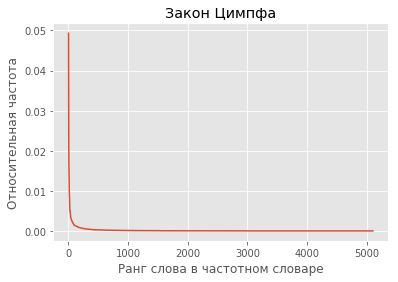

In [30]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

X = list(bb1.values()) # достаем из словаря только значения (порядковый номер) и делаем из этого массив
Y = list(dd.values()) #достаем из словаря только значения (относительная частота) и делаем из этого массив
         
plt.plot(X,Y), # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова в частотном словаре")
plt.ylabel("Относительная частота")
plt.show()

3) Очистите текст от стоп-слов.

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words('english') #заносим в переменную английские стоп-слова из библиотеки

#очищаем текст от стоп-слов
no_stop_words = [w for w in word_tokenize(lemmas) if w not in sw]

Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [32]:
#с помощью counts считаем частотность слов в тексте
counts1 = Counter(no_stop_words)
counts_dict1 = dict(counts1) #делаем из массива словарь
# сортируем словарь
sorted_counts1 = sorted(counts_dict1.items(), key=lambda x: x[1], reverse=True)
sorted_counts2 = dict(sorted_counts1) #словарь делаем из массива
z = sorted_counts2.keys()
z1 = list(z) #массив слов 
r = sorted_counts2.values()
r1 = list(r) #массив кол-ва употрблений слов


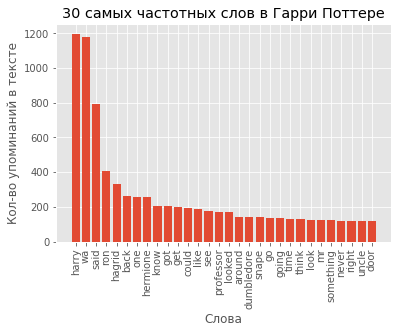

In [14]:
X = [i for i in range(0,30)] #берем только первые 30 слов
Y = r1[:30] #первые 30 значений в словаре

plt.bar(X, Y)
plt.xticks(X, z1, rotation=90) #делаем подписи по оси x - слова
plt.title("30 самых частотных слов в Гарри Поттере")
plt.xlabel("Слова")
plt.ylabel("Кол-во упоминаний в тексте")
plt.show()